In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
xls = pd.ExcelFile('crunchbase_monthly_export_d43b4klo2ade53.xlsx')

In [3]:
xls.sheet_names

['License',
 'Analysis',
 'Companies',
 'Rounds',
 'Investments',
 'Acquisitions',
 'Additions']

In [133]:
df1 = pd.read_excel(xls, 'Investments')

### Dropping columns with Nan

In [135]:
df1 = df1[(df1['company_region'] == 'SF Bay Area')]
df1 = df1[(df1['funded_year'] >= 2004)]
print(df1.shape)
df1 = df1[df1['raised_amount_usd'].isna() == False]
df1 = df1[df1['company_name'].isna() == False]

print(df1.shape)

(29220, 24)
(29220, 24)


What Years Are Represented?

In [57]:
sorted(list(df1['funded_year'].unique()))

[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]

In [58]:
grouped_df1 = df1.groupby(['company_name'])['raised_amount_usd']

In [59]:
keys = []
funding = []
fund_dict = {}
for key, item in grouped_df1:
    keys.append(key)
    fund_dict[key] = grouped_df1.get_group(key)
    #print(key)
    #print(grouped_df1.get_group(key), "\n")

## Looking at 23andMe, just because it's a cool company

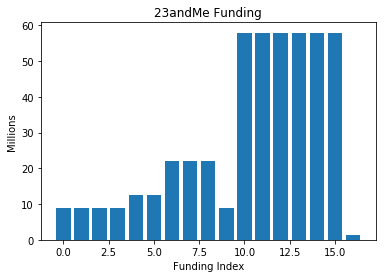

In [60]:
plt.bar(range(len(fund_dict['23andMe'])), fund_dict['23andMe']/1e6)
plt.title('23andMe Funding')
plt.xlabel('Funding Index')
plt.ylabel('Millions')
plt.show()

In [61]:
len(fund_dict.keys())

4585

## Looking Into Most Funded Markets

In [62]:
grouped_df2 = df1.groupby(['company_market'])['raised_amount_usd']

In [63]:
keys_market = []
funding = []
market_dict = {}
for key, item in grouped_df2:
    keys_market.append(key)
    market_dict[key] = sum(grouped_df2.get_group(key))
    #print(key)
    #print(grouped_df2.get_group(key), "\n")

In [96]:
from heapq import nlargest
largest = nlargest(20, market_dict, key=market_dict.get)
print(largest) 

['Biotechnology', 'Software', 'Clean Technology', 'Health Care', 'Enterprise Software', 'Semiconductors', 'Transportation', 'Curated Web', 'Mobile', 'Analytics', 'Technology', 'Advertising', 'Hardware + Software', 'Games', 'Security', 'E-Commerce', 'Web Hosting', 'Cloud Data Services', 'Solar', 'Storage']


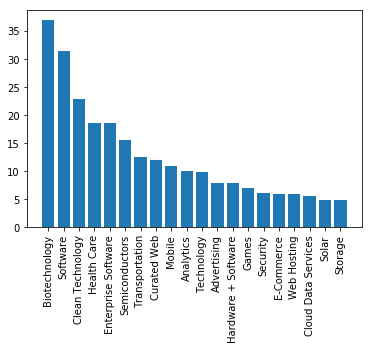

In [97]:
plt.bar(largest,[market_dict[x]/1e9 for x in largest])
plt.xticks(rotation='vertical')
plt.show()

## Looking At Redpoint Ventures

In [66]:
df_rp = df1[df1['investor_name'] == 'Redpoint Ventures']
df_rp.head(10)

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,...,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
2405,/organization/danger,Danger,|Software|,Software,USA,CA,SF Bay Area,Palo Alto,/organization/redpoint-ventures,Redpoint Ventures,...,SF Bay Area,Menlo Park,/funding-round/bfd8f47262c1638a738883926ba2272c,venture,D,2004-07-01,2004-07,2004-Q3,2004,37000000.0
2462,/organization/mobitv,MobiTV,|Games|,Games,USA,CA,SF Bay Area,Emeryville,/organization/redpoint-ventures,Redpoint Ventures,...,SF Bay Area,Menlo Park,/funding-round/7374e1d8531066ea372aede1367a23a7,venture,B,2004-08-01,2004-08,2004-Q3,2004,15000000.0
2463,/organization/jotspot,JotSpot,|Software|,Software,USA,CA,SF Bay Area,Palo Alto,/organization/redpoint-ventures,Redpoint Ventures,...,SF Bay Area,Menlo Park,/funding-round/d966991ee0c161359a4405cac22e0152,venture,A,2004-08-01,2004-08,2004-Q3,2004,5200000.0
2840,/organization/fanfare-group,The Fanfare Group,|Enterprise Software|,Enterprise Software,USA,CA,SF Bay Area,Mountain View,/organization/redpoint-ventures,Redpoint Ventures,...,SF Bay Area,Menlo Park,/funding-round/0336fe7b357962d75e2103b9bb575e15,venture,B,2005-01-01,2005-01,2005-Q1,2005,8000000.0
3200,/organization/thefind,"TheFind, Inc.",|Mobile|Local|Search|Shopping|E-Commerce|,E-Commerce,USA,CA,SF Bay Area,Mountain View,/organization/redpoint-ventures,Redpoint Ventures,...,SF Bay Area,Menlo Park,/funding-round/ccd4eb896b6b0abb40d87bc7a70c9961,venture,A,2005-02-01,2005-02,2005-Q1,2005,7000000.0
3496,/organization/movaris,Movaris,|Software|,Software,USA,CA,SF Bay Area,San Jose,/organization/redpoint-ventures,Redpoint Ventures,...,SF Bay Area,Menlo Park,/funding-round/456597f1a43d11b65045bd40eb407ddb,venture,C,2005-03-01,2005-03,2005-Q1,2005,10000000.0
3704,/organization/outerbay-technologies,OuterBay Technologies,|Software|,Software,USA,CA,SF Bay Area,Cupertino,/organization/redpoint-ventures,Redpoint Ventures,...,SF Bay Area,Menlo Park,/funding-round/851ed5154f69171041f39e997f2cf9ee,venture,C,2005-03-21,2005-03,2005-Q1,2005,12000000.0
3926,/organization/trapeze-networks,Trapeze Networks,|Wireless|Security|,Wireless,USA,CA,SF Bay Area,Pleasanton,/organization/redpoint-ventures,Redpoint Ventures,...,SF Bay Area,Menlo Park,/funding-round/3cc8aa80b4b99d171d4fc37ccee07a19,venture,C,2005-04-06,2005-04,2005-Q2,2005,17500000.0
4002,/organization/kazeon,Kazeon,|Software|,Software,USA,CA,SF Bay Area,Mountain View,/organization/redpoint-ventures,Redpoint Ventures,...,SF Bay Area,Menlo Park,/funding-round/e2f8d7a1fa867893aeead2a08e33458b,venture,B,2005-04-17,2005-04,2005-Q2,2005,10000000.0
5261,/organization/cortina-systems,Cortina Systems,|Hardware|Software|Semiconductors|Hardware + S...,Hardware,USA,CA,SF Bay Area,Sunnyvale,/organization/redpoint-ventures,Redpoint Ventures,...,SF Bay Area,Menlo Park,/funding-round/9170adea6ddab2901df7fda70e2a5a24,venture,C,2005-08-10,2005-08,2005-Q3,2005,30000000.0


In [67]:
#print(df_rp['raised_amount_usd'].sum()/1e6,"million")

3130.551032 million


In [73]:
grouped_df3 = df1.groupby(['funding_round_code'])['raised_amount_usd']

## Average Funding Per Round

In [83]:
keys_funding_round_code = []
funding_round_dict = {}
for key, item in grouped_df3:
    keys_funding_round_code.append(key)
    funding_round_dict[key] = sum(grouped_df3.get_group(key))/len(grouped_df3.get_group(key))
    #print(key)
    #print(grouped_df2.get_group(key), "\n")

In [85]:
print(funding_round_dict.keys())
funding_round_dict.values()

dict_keys(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])


dict_values([7207014.403003107, 17139449.768692117, 24654974.959298685, 36226887.297698945, 37544372.876777254, 50240607.07931034, 74752909.9361702, 50000000.0])

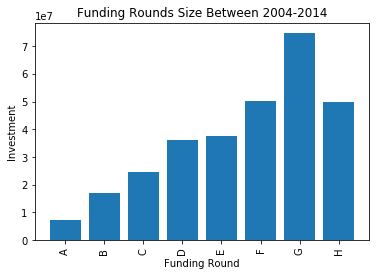

In [95]:
plt.bar(funding_round_dict.keys(),funding_round_dict.values())
plt.xticks(rotation='vertical')
plt.xlabel('Funding Round')
plt.ylabel('Investment')
plt.title('Funding Round Size Between 2004-2014')
plt.show()

Number of startups who achieved funding

In [98]:
grouped_df4 = df1.groupby(['funding_round_code'])['company_name']

In [100]:
keys_funding_name_code = []
funding_name_dict = {}
for key, item in grouped_df4:
    keys_funding_name_code.append(key)
    funding_name_dict[key] = grouped_df4.get_group(key)
    #print(key)
    #print(grouped_df2.get_group(key), "\n")

In [101]:
funding_name_dict.keys()

dict_keys(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])

In [114]:
funding_name_dict.values();

In [112]:
funding_counts = []
for alpha in funding_name_dict.keys():
    funding_counts.append(sum([1 for x in funding_name_dict[alpha]]))

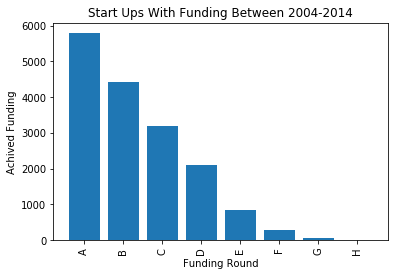

In [115]:
plt.bar(funding_name_dict.keys(),funding_counts)
plt.xticks(rotation='vertical')
plt.xlabel('Funding Round')
plt.ylabel('Achived Funding')
plt.title('Start Ups With Funding Between 2004-2014')
plt.show()

## Companies With The Most Funding

In [136]:
grouped_df5 = df1.groupby(['company_name'])['raised_amount_usd']

In [137]:
keys_funding_company_code = []
funding_company_dict = {}
for key, item in grouped_df5:
    keys_funding_company_code.append(key)
    funding_company_dict[key] = sum(grouped_df5.get_group(key))
    #print(key)
    #print(grouped_df2.get_group(key), "\n")

In [138]:
funding_company_dict

{42: 4000000.0,
 '1000memories': 20190000.0,
 '100Plus': 2750000.0,
 '140 Proof': 16000000.0,
 '15Five': 17800000.0,
 '1Life Healthcare': 150000000.0,
 '1World Online': 1000000.0,
 '23andMe': 485299400.0,
 '2NDNATURE': 20000.0,
 '3-V Biosciences': 186178000.0,
 '365 Data Centers': 16000000.0,
 '37coins': 25000.0,
 '3D Control Systems': 28000.0,
 '3Jam': 8000000.0,
 '3Leaf': 250000000.0,
 '3Scan': 390000.0,
 '3TEN8': 6000000.0,
 '3VR': 115134388.0,
 '41st Parameter': 104610000.0,
 '42Floors': 90400000.0,
 '4Home': 3850000.0,
 '4INFO': 346576000.0,
 '4Soils': 50000.0,
 '500Friends': 54000000.0,
 '5th Finger': 7000000.0,
 '64 Pixels': 100000.0,
 '6Sense': 36000000.0,
 '6SensorLabs': 4000000.0,
 '6connect': 2000000.0,
 '8tracks Radio': 7279980.0,
 '99designs': 140000000.0,
 'A Bit Lucky': 61872618.0,
 'A la Mobile': 4050000.0,
 'A10 Networks': 232000000.0,
 'ACCO Semiconductor': 12191919.0,
 'ACT Biotech': 6567000.0,
 'ADARA': 129600000.0,
 'AEGEA Medical': 40099494.0,
 'AGEIA Technologies

In [154]:
most_funded_companies = nlargest(100, funding_company_dict, key=funding_company_dict.get)
print(most_funded_companies) 

['Uber', 'Nanosolar', 'Dropbox', 'Facebook', 'Pinterest', 'Twitter', 'Pure Storage', 'Box', 'Airbnb', 'Zynga', 'SurveyMonkey', 'Bloom Energy', 'Lyft', 'Pacific Biosciences', 'CardioDx', 'BrightSource Energy', 'Better Place', 'Square', 'InVitae', 'Cloudera', 'MiaSolé', 'DocuSign', 'Tesla Motors', 'Solyndra', 'Intarcia Therapeutics', 'Deem', 'Houzz', 'DataStax', 'SolarCity', 'FibroGen', 'Practice Fusion', 'New Relic', 'OncoMed Pharmaceuticals', 'Wealthfront', 'Yammer', 'Hortonworks', 'Sunrun', 'Cortina Systems', 'One Kings Lane', 'Castlight Health', 'Meru Networks', 'Perlegen Sciences', 'Good Technology', 'Automattic', 'Sungevity', 'View Inc.', 'Relypsa', 'ServiceMax', 'Flipboard', 'Apigee', 'Zuora', 'Silver Spring Networks', 'Lending Club', 'Stion', 'SoFi', 'Nutanix', 'The Climate Corporation', 'MuleSoft', 'AppDynamics', 'Slack', 'Visto', 'Okta', 'Anaplan', 'NeoPhotonics', 'Pearl Therapeutics', 'Turn', 'Nevro', 'Evernote', 'Quantenna Communications', 'Kabam', 'Vicarious', 'Expa', 'Palan

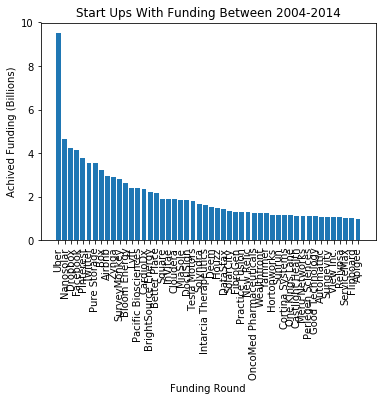

In [153]:
plt.bar(most_funded_companies,[funding_company_dict[x]/1e9 for x in most_funded_companies])
plt.xticks(rotation='vertical')
plt.xlabel('Funding Round')
plt.ylabel('Achived Funding (Billions)')
plt.title('Start Ups With Funding Between 2004-2014')
plt.show()